**Authors:** Jozef Hanč, Martina Hančová <br> *[Faculty of Science](https://www.upjs.sk/en/faculty-of-science/?prefferedLang=EN), P. J. Šafárik University in Košice, Slovakia* <br> emails: [jozef.hanc@upjs.sk](mailto:jozef.hanc@upjs.sk)
***

# <font color = brown, size=6> Numerical inversion of ratio (Broda-Kan Approach) </font>

# <font color = brown>Numerical study - built-in integrator <br> with Cheb.interpolation

<font size=5> Computational tools: </font>  **<font size=5>MATLAB (CPU parallelization</font>** 

code `cf_Ratio_BKB.m` 

---

**Section 3.2:** Broda-Kan inversion formula for ratio $T$ of independent RVs $X_1,X_2$
$$
f_T(x) = \frac{1}{\pi^2} \int_0^{+\infty} \int_{-\infty}^{+\infty} \Re\left\{\frac{\varphi_{X_1}(t_1)}{t_2} \varphi_{X_2}^{\prime}(-t_2 - x t_1)\right\} d t_1 d t_2.
$$

**Ref.** Hanč J., Hančová M., Borovský D., Probability distributions and calculations for Hake’s ratio statistics in measuring effect size, 
*preprint submitted to Statistical Papers*

---

`cf_Ratio_BKB.m` calculates **BK** formula for the **ratio** PDF as the iterated integration via the **B**uilt-in 1D integrator (integral}
$$
f_T(x) = \frac{1}{\pi^2}  \int_{-\infty}^{+\infty}  \Re\left\{ \varphi_{X_1}(t_1)\int_0^{+\infty} 
\frac{\varphi_{X_2}'(-t_2 - x t_1)}{t_2} d t_2 \right\} d t_1
$$

---

# Numerical study - Hake ratio

For ratio of independent normal variables:  $T = X_1/X_2$

Numerator $ X_1 \sim N(a, 1), a = 1.5 $:
- CF: $ \varphi_{X_1}(t) = e^{i a t - \frac{t^2}{2}}$

Denominator $ X_2 \sim N(b, 1) $, $ b = 1 $\:
- CF: $ \varphi_{X_2}(t) = e^{i b t - \frac{t^2}{2}}$


In [1]:
% characteristic function of X1 ~ N(a,1)
a = 1.5;
cf1 = @(t1) exp(1i * a * t1 - t1.^2 / 2);

% characteristic function of X2 ~ N(b,1) and its derivative
b = 1;
cf2 = @(t2) exp(1i * b* t2 - t2.^2 / 2);
cf2_dif = @(t2) (1i*b - t2) .* exp(1i * b* t2 - t2.^2 / 2);

# Set of points x for PDF

In [2]:
% Reading pre-calculated quadrupole precision values of x and PDF
n = 4; % Number of iterations
dataFolder = "D:\Dropbox\00 Jupyter\00 Matematika\Probastat\data\MathematicaMATLAB\data\";

% Loop to read data for 10^(n+1) points
for k = 1:n
    % Create the key as a string
    key = num2str(10^k);
    
    % Construct file paths
    xFilePath = sprintf('%sxvalues%d.txt', dataFolder, 10^k);
    sageQPFilePath = sprintf('%sSage_QPpdf%d.txt', dataFolder, 10^k);
    
    % Read the text files
    dx(key) = load(xFilePath, '-ascii'); % Using `-ascii` to read numerical text files
    dsageQP(key) = load(sageQPFilePath, '-ascii');
end

% Access data from dx or dsageQP using the key
format long;
disp('Data for 10 points:');
disp(dx('10')); % Accessing the data for the key '10', corresponding to k=0
disp(dsageQP('10')); % Accessing the data for the key '10', corresponding to k=0
format short; % Set back to default short format

Data for 10 points:
  -4.500000000000000
  -3.166666666666667
  -1.833333333333333
  -0.500000000000000
   0.833333333333333
   2.166666666666667
   3.500000000000000
   4.833333333333333
   6.166666666666667
   7.500000000000000

   0.010857191405375
   0.016964082520186
   0.027195141188685
   0.052692510471108
   0.363983717833685
   0.122015600892843
   0.045362568404555
   0.022301977251817
   0.013014648811622
   0.008464408087941



In [3]:
% set of points x
xN = 1000;
x = dx(num2str(xN));
SagePDF = dsageQP(num2str(xN));

# PDF via the built-in 1D integrator
code `cf_Ratio_BKB.m` 

#### measuring runtime

In [4]:
% Initialize the structure to store performance data for methods
performance.method = {}; % method of calculation
performance.rt = []; % runtime
performance.rtPerPoint = []; % runtime per point
performance.acceleration = []; % acceleration
performance.error = []; % max error

## BKB Cheb infinity lims + symb.der cf2

### illustrative example

In [5]:
% setting options
clear options;
options.isPlot = true;
options.InfinityLimits = true;
options.isInterp = true;
options.parallelCPU = true;

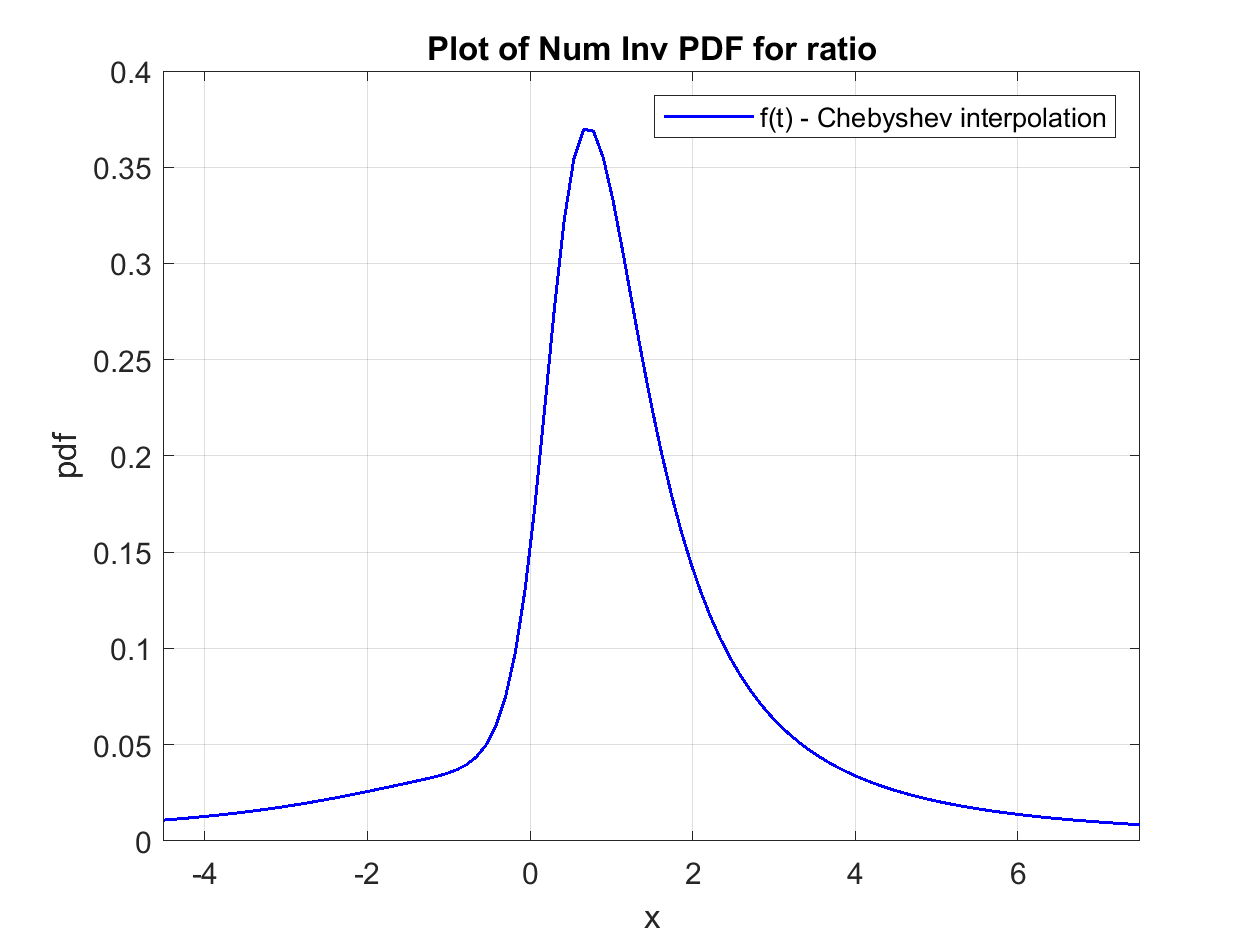

         Description: 'PDF of ratio X1/X2 from the char. functions'
     inversionMethod: 'Broda-Kan'
    quadratureMethod: 'Built-in 1D numerical integration with Chebyshev interpolation https://www.mathworks.com/help/matlab/ref/integral.html'
          methodAbbr: 'BKB:CC129:Infs:NumDer:parCPU:1e-03'
        parallelCPUs: 8
                 cf1: @(t1)exp(1i*a*t1-t1.^2/2)
                 cf2: @(t2)exp(1i*b*t2-t2.^2/2)
      cf2derSymbolic: []
                  xN: 129
                   x: [-4.5008 -4.4989 -4.4935 -4.4845 -4.4719 -4.4556 -4.4358 -4.4124 -4.3855 -4.3550 -4.3209 -4.2834 -4.2424 -4.1979 -4.1500 -4.0987 -4.0440 -3.9859 ... ] (1x129 double)
                 pdf: [0.0109 0.0109 0.0109 0.0109 0.0110 0.0110 0.0111 0.0112 0.0113 0.0114 0.0115 0.0116 0.0118 0.0119 0.0121 0.0123 0.0126 0.0128 0.0131 0.0133 0.0137 ... ] (1x129 double)
                 PDF: @(x1new)InterpPDF(x1new,x1,Rpdf)
              t1_min: -Inf
              t1_max: Inf
              t2_min: 1.0000e-15
     

In [6]:
% num inversion of ratio
[result, Rpdf] = cf_Ratio_BKB(cf1, cf2, [], options);
disp(result)

In [7]:
%calculation Chebyshev interpolation
runtime = result.runtime;
result.xN = length(x);

timeVal = tic;
Rpdfc = result.PDF(x);
tictoc = toc(timeVal);

result.runtime = runtime + tictoc;
result.error = max(abs(Rpdfc-SagePDF));
disp(result.error)

   5.2683e-08



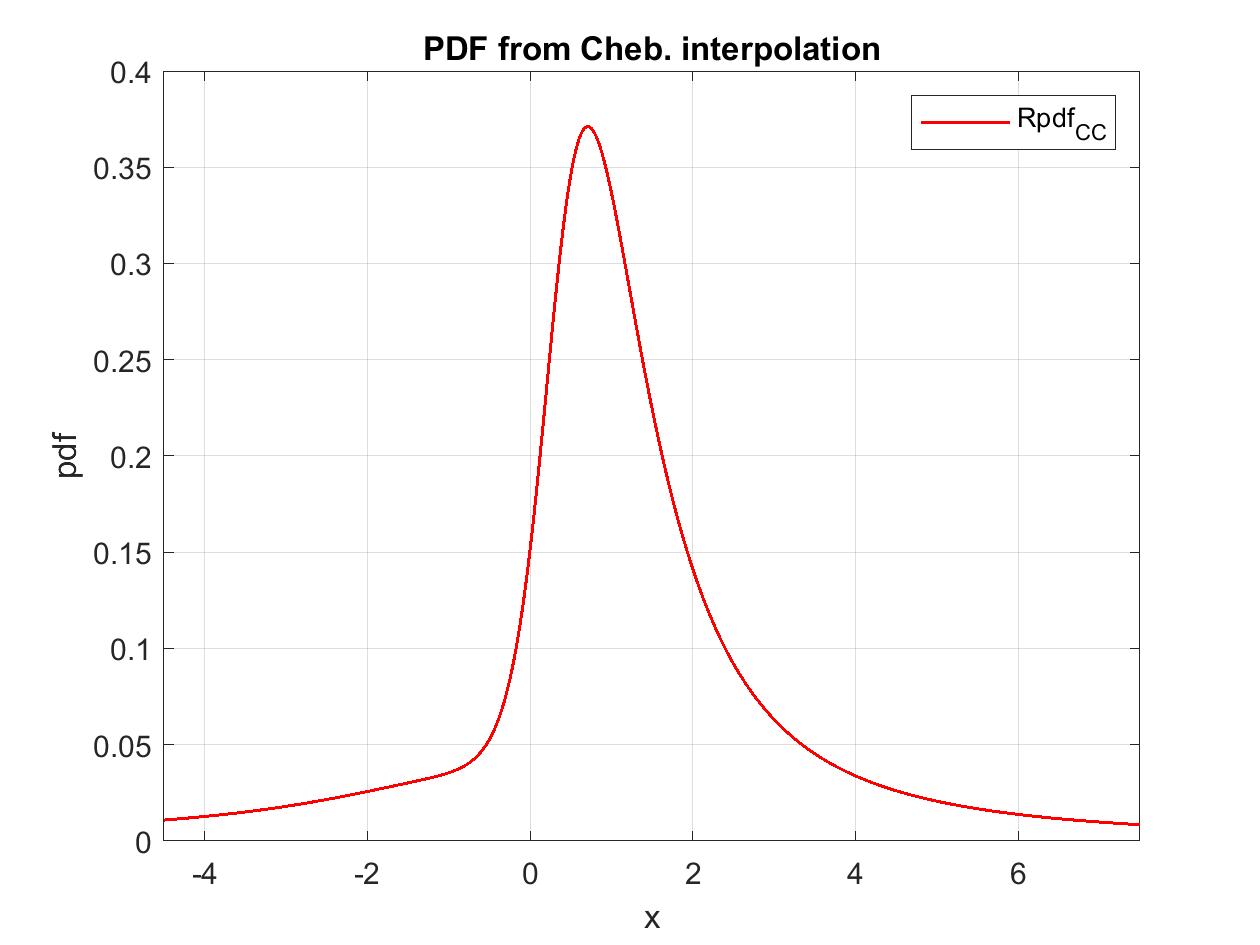

In [8]:
%PDF from Cheb interpolation vs. from Cheb points
figure
plot(x, Rpdfc, 'r', 'LineWidth', 1);
xlim([min(x) max(x)]) % plot in  sigma range
grid on;
title('PDF from Cheb. interpolation')
xlabel('x')
ylabel('pdf')   
legend('Rpdf_{CC}');

### Num experiments rtol: $1e-3,1e-4,..., 1e-15$
 

In [9]:
% setting options
clear options;
options.isPlot = false;
options.InfinityLimits = true;
options.isInterp = true;
options.parallelCPU = true;

In [10]:
% Initialize the structure to store performance data for methods
performance.method = {}; % method of calculation
performance.rt = []; % runtime
performance.rtPerPoint = []; % runtime per point
performance.acceleration = []; % acceleration
performance.error = []; % max error

In [11]:
%initialization of variable for rtol
n = 2; run = false;
% options.rtol = 10^(-n);

In [12]:
% numerical experiments via rtol:1e-3,1e-4,..., 1e-15
%timeValTot = tic;
n = n+1;
%for n=nmin:nmax 
fprintf('Experiment: xN = %d, eps = 10^-%d\n', xN, n);

% relative tol
options.rtol = 10^(-n);

% num inversion of ratio - Chebyshev interpolant
[result, Rpdf] = cf_Ratio_BKB(cf1, cf2, [], options);

runtime = result.runtime;
timeVal = tic;

%calculation Chebyshev interpolation
Rpdfc = result.PDF(x);

tictoc = toc(timeVal);
result.runtime = runtime + tictoc;
result.error = max(abs(Rpdfc-SagePDF));
result.xN = xN;

fprintf('xN = %d, %s, eps = 10^-%d\n', xN, result.methodAbbr, n);
% measuring time
% simple tic-toc method 
% Update the performance structure and display the result
display = true;
%if n==nmax, display = true;end
performance = update_PerfStats(result, performance, display);
%end

% tictocTot = toc(timeValTot);
fprintf('Experiment runtime = %.2f s\n', result.runtime);
% fprintf('%s\n', repmat('*', 1, 25));

Experiment: xN = 1000, eps = 10^-3
xN = 1000, BKB:CC129:Infs:NumDer:parCPU:1e-03, eps = 10^-3
                            Performance statistics        
                    ______________________________________

    method          {'BKB:CC129:Infs:NumDer:parCPU:1e-03'}
    rt              {'[1.17e+00]'                        }
    rtPerPoint      {'[1.17e-03]'                        }
    acceleration    {'[1.00e+00]'                        }
    error           {'[5.27e-08]'                        }

Experiment runtime = 1.17 s


In [13]:
% numerical experiments via rtol:1e-3,1e-4,..., 1e-15
%timeValTot = tic;
n = n+1;
%for n=nmin:nmax 
fprintf('Experiment: xN = %d, eps = 10^-%d\n', xN, n);

% relative tol
options.rtol = 10^(-n);

% num inversion of ratio - Chebyshev interpolant
[result, Rpdf] = cf_Ratio_BKB(cf1, cf2, [], options);

runtime = result.runtime;
timeVal = tic;

%calculation Chebyshev interpolation
Rpdfc = result.PDF(x);

tictoc = toc(timeVal);
result.runtime = runtime + tictoc;
result.error = max(abs(Rpdfc-SagePDF));
result.xN = xN;

fprintf('xN = %d, %s, eps = 10^-%d\n', xN, result.methodAbbr, n);
% measuring time
% simple tic-toc method 
% Update the performance structure and display the result
display = true;
%if n==nmax, display = true;end
performance = update_PerfStats(result, performance, display);
%end

% tictocTot = toc(timeValTot);
fprintf('Experiment runtime = %.2f s\n', result.runtime);
% fprintf('%s\n', repmat('*', 1, 25));

Experiment: xN = 1000, eps = 10^-4
xN = 1000, BKB:CC129:Infs:NumDer:parCPU:1e-04, eps = 10^-4
                                               Performance statistics                           
                    ____________________________________________________________________________

    method          {'[BKB:CC129:Infs:NumDer:parCPU:1e-03, BKB:CC129:Infs:NumDer:parCPU:1e-04]'}
    rt              {'[1.17e+00 1.29e+00]'                                                     }
    rtPerPoint      {'[1.17e-03 1.29e-03]'                                                     }
    acceleration    {'[1.00e+00 9.12e-01]'                                                     }
    error           {'[5.27e-08 1.11e-08]'                                                     }

Experiment runtime = 1.29 s


In [14]:
% numerical experiments via rtol:1e-3,1e-4,..., 1e-15
%timeValTot = tic;
n = n+1;
%for n=nmin:nmax 
fprintf('Experiment: xN = %d, eps = 10^-%d\n', xN, n);

% relative tol
options.rtol = 10^(-n);

% num inversion of ratio - Chebyshev interpolant
[result, Rpdf] = cf_Ratio_BKB(cf1, cf2, [], options);

runtime = result.runtime;
timeVal = tic;

%calculation Chebyshev interpolation
Rpdfc = result.PDF(x);

tictoc = toc(timeVal);
result.runtime = runtime + tictoc;
result.error = max(abs(Rpdfc-SagePDF));
result.xN = xN;

fprintf('xN = %d, %s, eps = 10^-%d\n', xN, result.methodAbbr, n);
% measuring time
% simple tic-toc method 
% Update the performance structure and display the result
display = true;
%if n==nmax, display = true;end
performance = update_PerfStats(result, performance, display);
%end

% tictocTot = toc(timeValTot);
fprintf('Experiment runtime = %.2f s\n', result.runtime);
% fprintf('%s\n', repmat('*', 1, 25));

Experiment: xN = 1000, eps = 10^-5
xN = 1000, BKB:CC129:Infs:NumDer:parCPU:1e-05, eps = 10^-5
                                                                 Performance statistics                                             
                    ________________________________________________________________________________________________________________

    method          {'[BKB:CC129:Infs:NumDer:parCPU:1e-03, BKB:CC129:Infs:NumDer:parCPU:1e-04, BKB:CC129:Infs:NumDer:parCPU:1e-05]'}
    rt              {'[1.17e+00 1.29e+00 1.53e+00]'                                                                                }
    rtPerPoint      {'[1.17e-03 1.29e-03 1.53e-03]'                                                                                }
    acceleration    {'[1.00e+00 9.12e-01 7.69e-01]'                                                                                }
    error           {'[5.27e-08 1.11e-08 7.36e-09]'                                                        

In [15]:
% numerical experiments via rtol:1e-3,1e-4,..., 1e-15
%timeValTot = tic;
n = n+1;
%for n=nmin:nmax 
fprintf('Experiment: xN = %d, eps = 10^-%d\n', xN, n);

% relative tol
options.rtol = 10^(-n);

% num inversion of ratio - Chebyshev interpolant
[result, Rpdf] = cf_Ratio_BKB(cf1, cf2, [], options);

runtime = result.runtime;
timeVal = tic;

%calculation Chebyshev interpolation
Rpdfc = result.PDF(x);

tictoc = toc(timeVal);
result.runtime = runtime + tictoc;
result.error = max(abs(Rpdfc-SagePDF));
result.xN = xN;

fprintf('xN = %d, %s, eps = 10^-%d\n', xN, result.methodAbbr, n);
% measuring time
% simple tic-toc method 
% Update the performance structure and display the result
display = true;
%if n==nmax, display = true;end
performance = update_PerfStats(result, performance, display);
%end

% tictocTot = toc(timeValTot);
fprintf('Experiment runtime = %.2f s\n', result.runtime);
% fprintf('%s\n', repmat('*', 1, 25));

Experiment: xN = 1000, eps = 10^-6
xN = 1000, BKB:CC129:Infs:NumDer:parCPU:1e-06, eps = 10^-6
                                                                                   Performance statistics                                                               
                    ____________________________________________________________________________________________________________________________________________________

    method          {'[BKB:CC129:Infs:NumDer:parCPU:1e-03, BKB:CC129:Infs:NumDer:parCPU:1e-04, BKB:CC129:Infs:NumDer:parCPU:1e-05, BKB:CC129:Infs:NumDer:parCPU:1e-06]'}
    rt              {'[1.17e+00 1.29e+00 1.53e+00 1.92e+00]'                                                                                                           }
    rtPerPoint      {'[1.17e-03 1.29e-03 1.53e-03 1.92e-03]'                                                                                                           }
    acceleration    {'[1.00e+00 9.12e-01 7.69e-01 6.11e-01]'

In [16]:
% numerical experiments via rtol:1e-3,1e-4,..., 1e-15
%timeValTot = tic;
n = n+1;
%for n=nmin:nmax 
fprintf('Experiment: xN = %d, eps = 10^-%d\n', xN, n);

% relative tol
options.rtol = 10^(-n);

% num inversion of ratio - Chebyshev interpolant
[result, Rpdf] = cf_Ratio_BKB(cf1, cf2, [], options);

runtime = result.runtime;
timeVal = tic;

%calculation Chebyshev interpolation
Rpdfc = result.PDF(x);

tictoc = toc(timeVal);
result.runtime = runtime + tictoc;
result.error = max(abs(Rpdfc-SagePDF));
result.xN = xN;

fprintf('xN = %d, %s, eps = 10^-%d\n', xN, result.methodAbbr, n);
% measuring time
% simple tic-toc method 
% Update the performance structure and display the result
display = true;
%if n==nmax, display = true;end
performance = update_PerfStats(result, performance, display);
%end

% tictocTot = toc(timeValTot);
fprintf('Experiment runtime = %.2f s\n', result.runtime);
% fprintf('%s\n', repmat('*', 1, 25));

Experiment: xN = 1000, eps = 10^-7
xN = 1000, BKB:CC129:Infs:NumDer:parCPU:1e-07, eps = 10^-7
                                                                                                     Performance statistics                                                                                 
                    ________________________________________________________________________________________________________________________________________________________________________________________

    method          {'[BKB:CC129:Infs:NumDer:parCPU:1e-03, BKB:CC129:Infs:NumDer:parCPU:1e-04, BKB:CC129:Infs:NumDer:parCPU:1e-05, BKB:CC129:Infs:NumDer:parCPU:1e-06, BKB:CC129:Infs:NumDer:parCPU:1e-07]'}
    rt              {'[1.17e+00 1.29e+00 1.53e+00 1.92e+00 3.80e+00]'                                                                                                                                      }
    rtPerPoint      {'[1.17e-03 1.29e-03 1.53e-03 1.92e-03 3.80e-03]'                

In [17]:
% numerical experiments via rtol:1e-3,1e-4,..., 1e-15
%timeValTot = tic;
n = n+1;
%for n=nmin:nmax 
fprintf('Experiment: xN = %d, eps = 10^-%d\n', xN, n);

% relative tol
options.rtol = 10^(-n);

% num inversion of ratio - Chebyshev interpolant
[result, Rpdf] = cf_Ratio_BKB(cf1, cf2, [], options);

runtime = result.runtime;
timeVal = tic;

%calculation Chebyshev interpolation
Rpdfc = result.PDF(x);

tictoc = toc(timeVal);
result.runtime = runtime + tictoc;
result.error = max(abs(Rpdfc-SagePDF));
result.xN = xN;

fprintf('xN = %d, %s, eps = 10^-%d\n', xN, result.methodAbbr, n);
% measuring time
% simple tic-toc method 
% Update the performance structure and display the result
display = true;
%if n==nmax, display = true;end
performance = update_PerfStats(result, performance, display);
%end

% tictocTot = toc(timeValTot);
fprintf('Experiment runtime = %.2f s\n', result.runtime);
% fprintf('%s\n', repmat('*', 1, 25));

Experiment: xN = 1000, eps = 10^-8
xN = 1000, BKB:CC129:Infs:NumDer:parCPU:1e-08, eps = 10^-8
                                                                                                                       Performance statistics                                                                                                   
                    ____________________________________________________________________________________________________________________________________________________________________________________________________________________________

    method          {'[BKB:CC129:Infs:NumDer:parCPU:1e-03, BKB:CC129:Infs:NumDer:parCPU:1e-04, BKB:CC129:Infs:NumDer:parCPU:1e-05, BKB:CC129:Infs:NumDer:parCPU:1e-06, BKB:CC129:Infs:NumDer:parCPU:1e-07, BKB:CC129:Infs:NumDer:parCPU:1e-08]'}
    rt              {'[1.17e+00 1.29e+00 1.53e+00 1.92e+00 3.80e+00 1.64e+01]'                                                                                                        

In [18]:
% numerical experiments via rtol:1e-3,1e-4,..., 1e-15
%timeValTot = tic;
n = n+1;
%for n=nmin:nmax 
fprintf('Experiment: xN = %d, eps = 10^-%d\n', xN, n);

% relative tol
options.rtol = 10^(-n);

% num inversion of ratio - Chebyshev interpolant
[result, Rpdf] = cf_Ratio_BKB(cf1, cf2, [], options);

runtime = result.runtime;
timeVal = tic;

%calculation Chebyshev interpolation
Rpdfc = result.PDF(x);

tictoc = toc(timeVal);
result.runtime = runtime + tictoc;
result.error = max(abs(Rpdfc-SagePDF));
result.xN = xN;

fprintf('xN = %d, %s, eps = 10^-%d\n', xN, result.methodAbbr, n);
% measuring time
% simple tic-toc method 
% Update the performance structure and display the result
display = true;
%if n==nmax, display = true;end
performance = update_PerfStats(result, performance, display);
%end

% tictocTot = toc(timeValTot);
fprintf('Experiment runtime = %.2f s\n', result.runtime);
% fprintf('%s\n', repmat('*', 1, 25));

Experiment: xN = 1000, eps = 10^-9
xN = 1000, BKB:CC129:Infs:NumDer:parCPU:1e-09, eps = 10^-9
                                                                                                                                         Performance statistics                                                                                                                     
                    ________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________

    method          {'[BKB:CC129:Infs:NumDer:parCPU:1e-03, BKB:CC129:Infs:NumDer:parCPU:1e-04, BKB:CC129:Infs:NumDer:parCPU:1e-05, BKB:CC129:Infs:NumDer:parCPU:1e-06, BKB:CC129:Infs:NumDer:parCPU:1e-07, BKB:CC129:Infs:NumDer:parCPU:1e-08, BKB:CC129:Infs:NumDer:parCPU:1e-09]'}
    rt              {'[1.17e+00 1.29e+00 1.53e+00 1.92e+00 3.80e+00 1.64e+

from 1e-5 accuracy does not increase.  
**Runtime for 1e-10 is more than 5 min, one point rt is more then 0.33 s**

### Num experiments Chebyshev nodes 2^k+1: k=3,...10
 

In [19]:
% setting options
clear options;
options.isPlot = false;
options.InfinityLimits = true;
options.isInterp = true;
options.parallelCPU = true;

In [20]:
% Initialize the structure to store performance data for methods
performance.method = {}; % method of calculation
performance.rt = []; % runtime
performance.rtPerPoint = []; % runtime per point
performance.acceleration = []; % acceleration
performance.error = []; % max error

In [21]:
%initialization of variable for rtol
k = 2; 
% options.chebyPts = 2^k+1;

In [22]:
xN

xN = 1000

In [23]:
% numerical experiments
%timeValTot = tic;
k = k+1;
%for n=nmin:nmax 
fprintf('Experiment: xN = %d, chebPts = 2^%d + 1\n', xN, k);

% relative tol
options.chebyPts = 2^k+1;

% num inversion of ratio - Chebyshev interpolant
[result, Rpdf] = cf_Ratio_BKB(cf1, cf2, [], options);

runtime = result.runtime;
timeVal = tic;

%calculation Chebyshev interpolation
Rpdfc = result.PDF(x);

tictoc = toc(timeVal);
result.runtime = runtime + tictoc;
result.error = max(abs(Rpdfc-SagePDF));
result.xN = xN;


fprintf('xN = %d, %s, chebPts = 2^%d + 1\n', xN, result.methodAbbr, k);
% measuring time
% simple tic-toc method 
% Update the performance structure and display the result
display = true;
%if n==nmax, display = true;end
performance = update_PerfStats(result, performance, display);
%end

% tictocTot = toc(timeValTot);
fprintf('Experiment runtime = %.2f s\n', result.runtime);
% fprintf('%s\n', repmat('*', 1, 25));
%disp(result);

Experiment: xN = 1000, chebPts = 2^3 + 1
xN = 1000, BKB:CC9:Infs:NumDer:parCPU:1e-03, chebPts = 2^3 + 1
                           Performance statistics       
                    ____________________________________

    method          {'BKB:CC9:Infs:NumDer:parCPU:1e-03'}
    rt              {'[1.59e-01]'                      }
    rtPerPoint      {'[1.59e-04]'                      }
    acceleration    {'[1.00e+00]'                      }
    error           {'[1.82e-01]'                      }

Experiment runtime = 0.16 s


In [24]:
% numerical experiments
%timeValTot = tic;
k = k+1;
%for n=nmin:nmax 
fprintf('Experiment: xN = %d, chebPts = 2^%d + 1\n', xN, k);

% relative tol
options.chebyPts = 2^k+1;

% num inversion of ratio - Chebyshev interpolant
[result, Rpdf] = cf_Ratio_BKB(cf1, cf2, [], options);

runtime = result.runtime;
timeVal = tic;

%calculation Chebyshev interpolation
Rpdfc = result.PDF(x);

tictoc = toc(timeVal);
result.runtime = runtime + tictoc;
result.error = max(abs(Rpdfc-SagePDF));
result.xN = xN;


fprintf('xN = %d, %s, chebPts = 2^%d + 1\n', xN, result.methodAbbr, k);
% measuring time
% simple tic-toc method 
% Update the performance structure and display the result
display = true;
%if n==nmax, display = true;end
performance = update_PerfStats(result, performance, display);
%end

% tictocTot = toc(timeValTot);
fprintf('Experiment runtime = %.2f s\n', result.runtime);
% fprintf('%s\n', repmat('*', 1, 25));
%disp(result);

Experiment: xN = 1000, chebPts = 2^4 + 1
xN = 1000, BKB:CC17:Infs:NumDer:parCPU:1e-03, chebPts = 2^4 + 1
                                             Performance statistics                          
                    _________________________________________________________________________

    method          {'[BKB:CC9:Infs:NumDer:parCPU:1e-03, BKB:CC17:Infs:NumDer:parCPU:1e-03]'}
    rt              {'[1.59e-01 2.18e-01]'                                                  }
    rtPerPoint      {'[1.59e-04 2.18e-04]'                                                  }
    acceleration    {'[1.00e+00 7.33e-01]'                                                  }
    error           {'[1.82e-01 8.24e-02]'                                                  }

Experiment runtime = 0.22 s


In [25]:
% numerical experiments
%timeValTot = tic;
k = k+1;
%for n=nmin:nmax 
fprintf('Experiment: xN = %d, chebPts = 2^%d + 1\n', xN, k);

% relative tol
options.chebyPts = 2^k+1;

% num inversion of ratio - Chebyshev interpolant
[result, Rpdf] = cf_Ratio_BKB(cf1, cf2, [], options);

runtime = result.runtime;
timeVal = tic;

%calculation Chebyshev interpolation
Rpdfc = result.PDF(x);

tictoc = toc(timeVal);
result.runtime = runtime + tictoc;
result.error = max(abs(Rpdfc-SagePDF));
result.xN = xN;


fprintf('xN = %d, %s, chebPts = 2^%d + 1\n', xN, result.methodAbbr, k);
% measuring time
% simple tic-toc method 
% Update the performance structure and display the result
display = true;
%if n==nmax, display = true;end
performance = update_PerfStats(result, performance, display);
%end

% tictocTot = toc(timeValTot);
fprintf('Experiment runtime = %.2f s\n', result.runtime);
% fprintf('%s\n', repmat('*', 1, 25));
%disp(result);

Experiment: xN = 1000, chebPts = 2^5 + 1
xN = 1000, BKB:CC33:Infs:NumDer:parCPU:1e-03, chebPts = 2^5 + 1
                                                               Performance statistics                                           
                    ____________________________________________________________________________________________________________

    method          {'[BKB:CC9:Infs:NumDer:parCPU:1e-03, BKB:CC17:Infs:NumDer:parCPU:1e-03, BKB:CC33:Infs:NumDer:parCPU:1e-03]'}
    rt              {'[1.59e-01 2.18e-01 3.44e-01]'                                                                            }
    rtPerPoint      {'[1.59e-04 2.18e-04 3.44e-04]'                                                                            }
    acceleration    {'[1.00e+00 7.33e-01 4.63e-01]'                                                                            }
    error           {'[1.82e-01 8.24e-02 1.10e-02]'                                                                     

In [26]:
% numerical experiments
%timeValTot = tic;
k = k+1;
%for n=nmin:nmax 
fprintf('Experiment: xN = %d, chebPts = 2^%d + 1\n', xN, k);

% relative tol
options.chebyPts = 2^k+1;

% num inversion of ratio - Chebyshev interpolant
[result, Rpdf] = cf_Ratio_BKB(cf1, cf2, [], options);

runtime = result.runtime;
timeVal = tic;

%calculation Chebyshev interpolation
Rpdfc = result.PDF(x);

tictoc = toc(timeVal);
result.runtime = runtime + tictoc;
result.error = max(abs(Rpdfc-SagePDF));
result.xN = xN;


fprintf('xN = %d, %s, chebPts = 2^%d + 1\n', xN, result.methodAbbr, k);
% measuring time
% simple tic-toc method 
% Update the performance structure and display the result
display = true;
%if n==nmax, display = true;end
performance = update_PerfStats(result, performance, display);
%end

% tictocTot = toc(timeValTot);
fprintf('Experiment runtime = %.2f s\n', result.runtime);
% fprintf('%s\n', repmat('*', 1, 25));
%disp(result);

Experiment: xN = 1000, chebPts = 2^6 + 1
xN = 1000, BKB:CC65:Infs:NumDer:parCPU:1e-03, chebPts = 2^6 + 1
                                                                                Performance statistics                                                             
                    _______________________________________________________________________________________________________________________________________________

    method          {'[BKB:CC9:Infs:NumDer:parCPU:1e-03, BKB:CC17:Infs:NumDer:parCPU:1e-03, BKB:CC33:Infs:NumDer:parCPU:1e-03, BKB:CC65:Infs:NumDer:parCPU:1e-03]'}
    rt              {'[1.59e-01 2.18e-01 3.44e-01 6.10e-01]'                                                                                                      }
    rtPerPoint      {'[1.59e-04 2.18e-04 3.44e-04 6.10e-04]'                                                                                                      }
    acceleration    {'[1.00e+00 7.33e-01 4.63e-01 2.61e-01]'              

In [27]:
% numerical experiments
%timeValTot = tic;
k = k+1;
%for n=nmin:nmax 
fprintf('Experiment: xN = %d, chebPts = 2^%d + 1\n', xN, k);

% relative tol
options.chebyPts = 2^k+1;

% num inversion of ratio - Chebyshev interpolant
[result, Rpdf] = cf_Ratio_BKB(cf1, cf2, [], options);

runtime = result.runtime;
timeVal = tic;

%calculation Chebyshev interpolation
Rpdfc = result.PDF(x);

tictoc = toc(timeVal);
result.runtime = runtime + tictoc;
result.error = max(abs(Rpdfc-SagePDF));
result.xN = xN;


fprintf('xN = %d, %s, chebPts = 2^%d + 1\n', xN, result.methodAbbr, k);
% measuring time
% simple tic-toc method 
% Update the performance structure and display the result
display = true;
%if n==nmax, display = true;end
performance = update_PerfStats(result, performance, display);
%end

% tictocTot = toc(timeValTot);
fprintf('Experiment runtime = %.2f s\n', result.runtime);
% fprintf('%s\n', repmat('*', 1, 25));
%disp(result);

Experiment: xN = 1000, chebPts = 2^7 + 1
xN = 1000, BKB:CC129:Infs:NumDer:parCPU:1e-03, chebPts = 2^7 + 1
                                                                                                  Performance statistics                                                                               
                    ___________________________________________________________________________________________________________________________________________________________________________________

    method          {'[BKB:CC9:Infs:NumDer:parCPU:1e-03, BKB:CC17:Infs:NumDer:parCPU:1e-03, BKB:CC33:Infs:NumDer:parCPU:1e-03, BKB:CC65:Infs:NumDer:parCPU:1e-03, BKB:CC129:Infs:NumDer:parCPU:1e-03]'}
    rt              {'[1.59e-01 2.18e-01 3.44e-01 6.10e-01 1.15e+00]'                                                                                                                                 }
    rtPerPoint      {'[1.59e-04 2.18e-04 3.44e-04 6.10e-04 1.15e-03]'                        

In [28]:
% numerical experiments
%timeValTot = tic;
k = k+1;
%for n=nmin:nmax 
fprintf('Experiment: xN = %d, chebPts = 2^%d + 1\n', xN, k);

% relative tol
options.chebyPts = 2^k+1;

% num inversion of ratio - Chebyshev interpolant
[result, Rpdf] = cf_Ratio_BKB(cf1, cf2, [], options);

runtime = result.runtime;
timeVal = tic;

%calculation Chebyshev interpolation
Rpdfc = result.PDF(x);

tictoc = toc(timeVal);
result.runtime = runtime + tictoc;
result.error = max(abs(Rpdfc-SagePDF));
result.xN = xN;


fprintf('xN = %d, %s, chebPts = 2^%d + 1\n', xN, result.methodAbbr, k);
% measuring time
% simple tic-toc method 
% Update the performance structure and display the result
display = true;
%if n==nmax, display = true;end
performance = update_PerfStats(result, performance, display);
%end

% tictocTot = toc(timeValTot);
fprintf('Experiment runtime = %.2f s\n', result.runtime);
% fprintf('%s\n', repmat('*', 1, 25));
%disp(result);

Experiment: xN = 1000, chebPts = 2^8 + 1
xN = 1000, BKB:CC257:Infs:NumDer:parCPU:1e-03, chebPts = 2^8 + 1
                                                                                                                    Performance statistics                                                                                                 
                    _______________________________________________________________________________________________________________________________________________________________________________________________________________________

    method          {'[BKB:CC9:Infs:NumDer:parCPU:1e-03, BKB:CC17:Infs:NumDer:parCPU:1e-03, BKB:CC33:Infs:NumDer:parCPU:1e-03, BKB:CC65:Infs:NumDer:parCPU:1e-03, BKB:CC129:Infs:NumDer:parCPU:1e-03, BKB:CC257:Infs:NumDer:parCPU:1e-03]'}
    rt              {'[1.59e-01 2.18e-01 3.44e-01 6.10e-01 1.15e+00 2.19e+00]'                                                                                                           

In [29]:
% numerical experiments
%timeValTot = tic;
k = k+1;
%for n=nmin:nmax 
fprintf('Experiment: xN = %d, chebPts = 2^%d + 1\n', xN, k);

% relative tol
options.chebyPts = 2^k+1;

% num inversion of ratio - Chebyshev interpolant
[result, Rpdf] = cf_Ratio_BKB(cf1, cf2, [], options);

runtime = result.runtime;
timeVal = tic;

%calculation Chebyshev interpolation
Rpdfc = result.PDF(x);

tictoc = toc(timeVal);
result.runtime = runtime + tictoc;
result.error = max(abs(Rpdfc-SagePDF));
result.xN = xN;


fprintf('xN = %d, %s, chebPts = 2^%d + 1\n', xN, result.methodAbbr, k);
% measuring time
% simple tic-toc method 
% Update the performance structure and display the result
display = true;
%if n==nmax, display = true;end
performance = update_PerfStats(result, performance, display);
%end

% tictocTot = toc(timeValTot);
fprintf('Experiment runtime = %.2f s\n', result.runtime);
% fprintf('%s\n', repmat('*', 1, 25));
%disp(result);

Experiment: xN = 1000, chebPts = 2^9 + 1
xN = 1000, BKB:CC513:Infs:NumDer:parCPU:1e-03, chebPts = 2^9 + 1
                                                                                                                                      Performance statistics                                                                                                                   
                    ___________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________

    method          {'[BKB:CC9:Infs:NumDer:parCPU:1e-03, BKB:CC17:Infs:NumDer:parCPU:1e-03, BKB:CC33:Infs:NumDer:parCPU:1e-03, BKB:CC65:Infs:NumDer:parCPU:1e-03, BKB:CC129:Infs:NumDer:parCPU:1e-03, BKB:CC257:Infs:NumDer:parCPU:1e-03, BKB:CC513:Infs:NumDer:parCPU:1e-03]'}
    rt              {'[1.59e-01 2.18e-01 3.44e-01 6.10e-01 1.15e+00 2.19e+00 

In [30]:
% numerical experiments
%timeValTot = tic;
k = k+1;
%for n=nmin:nmax 
fprintf('Experiment: xN = %d, chebPts = 2^%d + 1\n', xN, k);

% relative tol
options.chebyPts = 2^k+1;

% num inversion of ratio - Chebyshev interpolant
[result, Rpdf] = cf_Ratio_BKB(cf1, cf2, [], options);

runtime = result.runtime;
timeVal = tic;

%calculation Chebyshev interpolation
Rpdfc = result.PDF(x);

tictoc = toc(timeVal);
result.runtime = runtime + tictoc;
result.error = max(abs(Rpdfc-SagePDF));
result.xN = xN;


fprintf('xN = %d, %s, chebPts = 2^%d + 1\n', xN, result.methodAbbr, k);
% measuring time
% simple tic-toc method 
% Update the performance structure and display the result
display = true;
%if n==nmax, display = true;end
performance = update_PerfStats(result, performance, display);
%end

% tictocTot = toc(timeValTot);
fprintf('Experiment runtime = %.2f s\n', result.runtime);
% fprintf('%s\n', repmat('*', 1, 25));
%disp(result);

Experiment: xN = 1000, chebPts = 2^10 + 1
xN = 1000, BKB:CC1025:Infs:NumDer:parCPU:1e-03, chebPts = 2^10 + 1
                                                                                                                                                         Performance statistics                                                                                                                                     
                    ________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________

    method          {'[BKB:CC9:Infs:NumDer:parCPU:1e-03, BKB:CC17:Infs:NumDer:parCPU:1e-03, BKB:CC33:Infs:NumDer:parCPU:1e-03, BKB:CC65:Infs:NumDer:parCPU:1e-03, BKB:CC129:Infs:NumDer:parCPU:1e-03, BKB:CC257:Infs:NumDer:parCPU:1e-03, BKB:CC513:Infs:NumDer:parCPU:1e-03, BK

In [31]:
% numerical experiments
%timeValTot = tic;
k = k+1;
%for n=nmin:nmax 
fprintf('Experiment: xN = %d, chebPts = 2^%d + 1\n', xN, k);

% relative tol
options.chebyPts = 2^k+1;

% num inversion of ratio - Chebyshev interpolant
[result, Rpdf] = cf_Ratio_BKB(cf1, cf2, [], options);

runtime = result.runtime;
timeVal = tic;

%calculation Chebyshev interpolation
Rpdfc = result.PDF(x);

tictoc = toc(timeVal);
result.runtime = runtime + tictoc;
result.error = max(abs(Rpdfc-SagePDF));
result.xN = xN;


fprintf('xN = %d, %s, chebPts = 2^%d + 1\n', xN, result.methodAbbr, k);
% measuring time
% simple tic-toc method 
% Update the performance structure and display the result
display = true;
%if n==nmax, display = true;end
performance = update_PerfStats(result, performance, display);
%end

% tictocTot = toc(timeValTot);
fprintf('Experiment runtime = %.2f s\n', result.runtime);
% fprintf('%s\n', repmat('*', 1, 25));
%disp(result);

Experiment: xN = 1000, chebPts = 2^11 + 1
xN = 1000, BKB:CC2049:Infs:NumDer:parCPU:1e-03, chebPts = 2^11 + 1
                                                                                                                                                                           Performance statistics                                                                                                                                                        
                    _____________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________

    method          {'[BKB:CC9:Infs:NumDer:parCPU:1e-03, BKB:CC17:Infs:NumDer:parCPU:1e-03, BKB:CC33:Infs:NumDer:parCPU:1e-03, BKB:CC65:Infs:NumDer:parCPU:1e-03, BKB:CC129:Infs:NumDer:parCPU:1e-03, 

In [32]:
% numerical experiments
%timeValTot = tic;
k = k+1;
%for n=nmin:nmax 
fprintf('Experiment: xN = %d, chebPts = 2^%d + 1\n', xN, k);

% relative tol
options.chebyPts = 2^k+1;

% num inversion of ratio - Chebyshev interpolant
[result, Rpdf] = cf_Ratio_BKB(cf1, cf2, [], options);

runtime = result.runtime;
timeVal = tic;

%calculation Chebyshev interpolation
Rpdfc = result.PDF(x);

tictoc = toc(timeVal);
result.runtime = runtime + tictoc;
result.error = max(abs(Rpdfc-SagePDF));
result.xN = xN;


fprintf('xN = %d, %s, chebPts = 2^%d + 1\n', xN, result.methodAbbr, k);
% measuring time
% simple tic-toc method 
% Update the performance structure and display the result
display = true;
%if n==nmax, display = true;end
performance = update_PerfStats(result, performance, display);
%end

% tictocTot = toc(timeValTot);
fprintf('Experiment runtime = %.2f s\n', result.runtime);
% fprintf('%s\n', repmat('*', 1, 25));
%disp(result);

Experiment: xN = 1000, chebPts = 2^12 + 1
xN = 1000, BKB:CC4097:Infs:NumDer:parCPU:1e-03, chebPts = 2^12 + 1
                                                                                                                                                                                              Performance statistics                                                                                                                                                                          
                    __________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________

    method          {'[BKB:CC9:Infs:NumDer:parCPU:1e-03, BKB:CC17:Infs:NumDer:parCPU:1e-03, BKB:CC33:Infs:NumDer:parCPU:1e-0

In [34]:
% numerical experiments
%timeValTot = tic;
k = k+1;
%for n=nmin:nmax 
fprintf('Experiment: xN = %d, chebPts = 2^%d + 1\n', xN, k);

% relative tol
options.chebyPts = 2^k+1;

% num inversion of ratio - Chebyshev interpolant
[result, Rpdf] = cf_Ratio_BKB(cf1, cf2, [], options);

runtime = result.runtime;
timeVal = tic;

%calculation Chebyshev interpolation
Rpdfc = result.PDF(x);

tictoc = toc(timeVal);
result.runtime = runtime + tictoc;
result.error = max(abs(Rpdfc-SagePDF));
result.xN = xN;


fprintf('xN = %d, %s, chebPts = 2^%d + 1\n', xN, result.methodAbbr, k);
% measuring time
% simple tic-toc method 
% Update the performance structure and display the result
display = true;
%if n==nmax, display = true;end
performance = update_PerfStats(result, performance, display);
%end

% tictocTot = toc(timeValTot);
fprintf('Experiment runtime = %.2f s\n', result.runtime);
% fprintf('%s\n', repmat('*', 1, 25));
%disp(result);

Experiment: xN = 1000, chebPts = 2^14 + 1
xN = 1000, BKB:CC16385:Infs:NumDer:parCPU:1e-03, chebPts = 2^14 + 1
                                                                                                                                                                                                                                   Performance statistics                                                                                                                                                                                                                
                    ____________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________

In [35]:
% numerical experiments
%timeValTot = tic;
k = k+1;
%for n=nmin:nmax 
fprintf('Experiment: xN = %d, chebPts = 2^%d + 1\n', xN, k);

% relative tol
options.chebyPts = 2^k+1;

% num inversion of ratio - Chebyshev interpolant
[result, Rpdf] = cf_Ratio_BKB(cf1, cf2, [], options);

runtime = result.runtime;
timeVal = tic;

%calculation Chebyshev interpolation
Rpdfc = result.PDF(x);

tictoc = toc(timeVal);
result.runtime = runtime + tictoc;
result.error = max(abs(Rpdfc-SagePDF));
result.xN = xN;


fprintf('xN = %d, %s, chebPts = 2^%d + 1\n', xN, result.methodAbbr, k);
% measuring time
% simple tic-toc method 
% Update the performance structure and display the result
display = true;
%if n==nmax, display = true;end
performance = update_PerfStats(result, performance, display);
%end

% tictocTot = toc(timeValTot);
fprintf('Experiment runtime = %.2f s\n', result.runtime);
% fprintf('%s\n', repmat('*', 1, 25));
%disp(result);

Experiment: xN = 1000, chebPts = 2^15 + 1
xN = 1000, BKB:CC32769:Infs:NumDer:parCPU:1e-03, chebPts = 2^15 + 1
                                                                                                                                                                                                                                                      Performance statistics                                                                                                                                                                                                                                   
                    ______________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________

### rtol = 1e-4

In [36]:
k = 6;
options.rtol = 1e-4;

In [37]:
% numerical experiments
%timeValTot = tic;
k = k+1;
%for n=nmin:nmax 
fprintf('Experiment: xN = %d, chebPts = 2^%d + 1\n', xN, k);

% relative tol
options.chebyPts = 2^k+1;

% num inversion of ratio - Chebyshev interpolant
[result, Rpdf] = cf_Ratio_BKB(cf1, cf2, [], options);

runtime = result.runtime;
timeVal = tic;

%calculation Chebyshev interpolation
Rpdfc = result.PDF(x);

tictoc = toc(timeVal);
result.runtime = runtime + tictoc;
result.error = max(abs(Rpdfc-SagePDF));
result.xN = xN;


fprintf('xN = %d, %s, chebPts = 2^%d + 1\n', xN, result.methodAbbr, k);
% measuring time
% simple tic-toc method 
% Update the performance structure and display the result
display = true;
%if n==nmax, display = true;end
performance = update_PerfStats(result, performance, display);
%end

% tictocTot = toc(timeValTot);
fprintf('Experiment runtime = %.2f s\n', result.runtime);
% fprintf('%s\n', repmat('*', 1, 25));
%disp(result);

Experiment: xN = 1000, chebPts = 2^7 + 1
xN = 1000, BKB:CC129:Infs:NumDer:parCPU:1e-04, chebPts = 2^7 + 1
                                                                                                                                                                                                                                                                        Performance statistics                                                                                                                                                                                                                                                     
                    ______________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________

In [38]:
% numerical experiments
%timeValTot = tic;
k = k+1;
%for n=nmin:nmax 
fprintf('Experiment: xN = %d, chebPts = 2^%d + 1\n', xN, k);

% relative tol
options.chebyPts = 2^k+1;

% num inversion of ratio - Chebyshev interpolant
[result, Rpdf] = cf_Ratio_BKB(cf1, cf2, [], options);

runtime = result.runtime;
timeVal = tic;

%calculation Chebyshev interpolation
Rpdfc = result.PDF(x);

tictoc = toc(timeVal);
result.runtime = runtime + tictoc;
result.error = max(abs(Rpdfc-SagePDF));
result.xN = xN;


fprintf('xN = %d, %s, chebPts = 2^%d + 1\n', xN, result.methodAbbr, k);
% measuring time
% simple tic-toc method 
% Update the performance structure and display the result
display = true;
%if n==nmax, display = true;end
performance = update_PerfStats(result, performance, display);
%end

% tictocTot = toc(timeValTot);
fprintf('Experiment runtime = %.2f s\n', result.runtime);
% fprintf('%s\n', repmat('*', 1, 25));
%disp(result);

Experiment: xN = 1000, chebPts = 2^8 + 1
xN = 1000, BKB:CC257:Infs:NumDer:parCPU:1e-04, chebPts = 2^8 + 1
                                                                                                                                                                                                                                                                                          Performance statistics                                                                                                                                                                                                                                                                       
                    __________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________

In [39]:
% numerical experiments
%timeValTot = tic;
k = k+1;
%for n=nmin:nmax 
fprintf('Experiment: xN = %d, chebPts = 2^%d + 1\n', xN, k);

% relative tol
options.chebyPts = 2^k+1;

% num inversion of ratio - Chebyshev interpolant
[result, Rpdf] = cf_Ratio_BKB(cf1, cf2, [], options);

runtime = result.runtime;
timeVal = tic;

%calculation Chebyshev interpolation
Rpdfc = result.PDF(x);

tictoc = toc(timeVal);
result.runtime = runtime + tictoc;
result.error = max(abs(Rpdfc-SagePDF));
result.xN = xN;


fprintf('xN = %d, %s, chebPts = 2^%d + 1\n', xN, result.methodAbbr, k);
% measuring time
% simple tic-toc method 
% Update the performance structure and display the result
display = true;
%if n==nmax, display = true;end
performance = update_PerfStats(result, performance, display);
%end

% tictocTot = toc(timeValTot);
fprintf('Experiment runtime = %.2f s\n', result.runtime);
% fprintf('%s\n', repmat('*', 1, 25));
%disp(result);

Experiment: xN = 1000, chebPts = 2^9 + 1
xN = 1000, BKB:CC513:Infs:NumDer:parCPU:1e-04, chebPts = 2^9 + 1
                                                                                                                                                                                                                                                                                                            Performance statistics                                                                                                                                                                                                                                                                                         
                    ______________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________

In [40]:
% numerical experiments
%timeValTot = tic;
k = k+1;
%for n=nmin:nmax 
fprintf('Experiment: xN = %d, chebPts = 2^%d + 1\n', xN, k);

% relative tol
options.chebyPts = 2^k+1;

% num inversion of ratio - Chebyshev interpolant
[result, Rpdf] = cf_Ratio_BKB(cf1, cf2, [], options);

runtime = result.runtime;
timeVal = tic;

%calculation Chebyshev interpolation
Rpdfc = result.PDF(x);

tictoc = toc(timeVal);
result.runtime = runtime + tictoc;
result.error = max(abs(Rpdfc-SagePDF));
result.xN = xN;


fprintf('xN = %d, %s, chebPts = 2^%d + 1\n', xN, result.methodAbbr, k);
% measuring time
% simple tic-toc method 
% Update the performance structure and display the result
display = true;
%if n==nmax, display = true;end
performance = update_PerfStats(result, performance, display);
%end

% tictocTot = toc(timeValTot);
fprintf('Experiment runtime = %.2f s\n', result.runtime);
% fprintf('%s\n', repmat('*', 1, 25));
%disp(result);

Experiment: xN = 1000, chebPts = 2^10 + 1
xN = 1000, BKB:CC1025:Infs:NumDer:parCPU:1e-04, chebPts = 2^10 + 1
                                                                                                                                                                                                                                                                                                                               Performance statistics                                                                                                                                                                                                                                                                                                           
                    ______________________________________________________________________________________________________________________________________________________________________________________________________________________________________

# SAVING results

In [41]:
% setting folder for a xlsx file
pwd;
folderPath = 'd:\Dropbox\00 Jupyter\00 Matematika\Probastat\data\MathematicaMATLAB\';

% Get the current date and time in a suitable format (e.g., YYYY-MM-DD-HH-MM-SS)
currentDateTime = datestr(now, 'yyyy_mm-dd-HH_MM_SS');

% Create the filename with N and date-time
fileName = sprintf('MTB-perfStats-BKB-CC-N%d-%s.xlsx', N, currentDateTime);

% Convert performance data structure to a table
perfTable = struct2table(performance);
filePath = fullfile(folderPath, fileName)

% Save as an Excel file
writetable(perfTable,filePath);

filePath = 'd:\Dropbox\00 Jupyter\00 Matematika\Probastat\data\MathematicaMATLAB\MTB-perfStats-BKB-CC-N1000-2024_11-17-17_43_38.xlsx'